In [1]:
# Import the improved query and utility functions
import matplotlib.pyplot as plt
from ethopy_analysis.data.utils  import get_setup
from ethopy_analysis.data.loaders import get_sessions
from ethopy_analysis.data.analysis import session_summary
from ethopy_analysis.plots import (
    difficultyPlot,
    LickPlot,
    plot_licks_state,
    plot_first_lick_after,
    valid_ready_state,
    plot_valid_proximity_state,
    plot_proximities_dur,
    calculate_proximity_duration,
    plot_trial_time,
    liquidsPlot,
    plot_states_in_time,
    plot_licks_time
)

from ethopy_analysis.config.styles import Style

# Apply default styling
Style().apply()


/Users/alexandros/Documents/GitHub/ethopy_plots/.venv/lib/python3.11/site-packages/datajoint/plugin.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# get the last animal id and session of the setup
animal_id, session = get_setup("ef-rp13")

session_summary(animal_id, session)


# # get all sessions(with min 2 trials) of animal_id x and select the last one
# animal_id = x

# sessions = get_sessions(animal_id, min_trials=2)
# session = sessions['session'].iloc[-1]

# session_summary(animal_id, session)

[2025-07-15 14:20:59,834][INFO]: DataJoint 0.14.4 connected to eflab@database.eflab.org:3306


Animal id: 290, session: 45
User name: bot
Setup: ef-rp13
Session start: 2025-07-15 10:30:01
Session duration: 1.90 hours (6842.8 seconds)

Experiment:  MatchPort
Stimulus:  Panda
Behavior:  MultiPort

Task filename: 2object_detection_visual-dif0-1.py
Git hash: b06989f

Session performance: 0.5376344086021505
Number of trials: 768


difficulty 0: performance 1.00
difficulty 1: performance 0.50


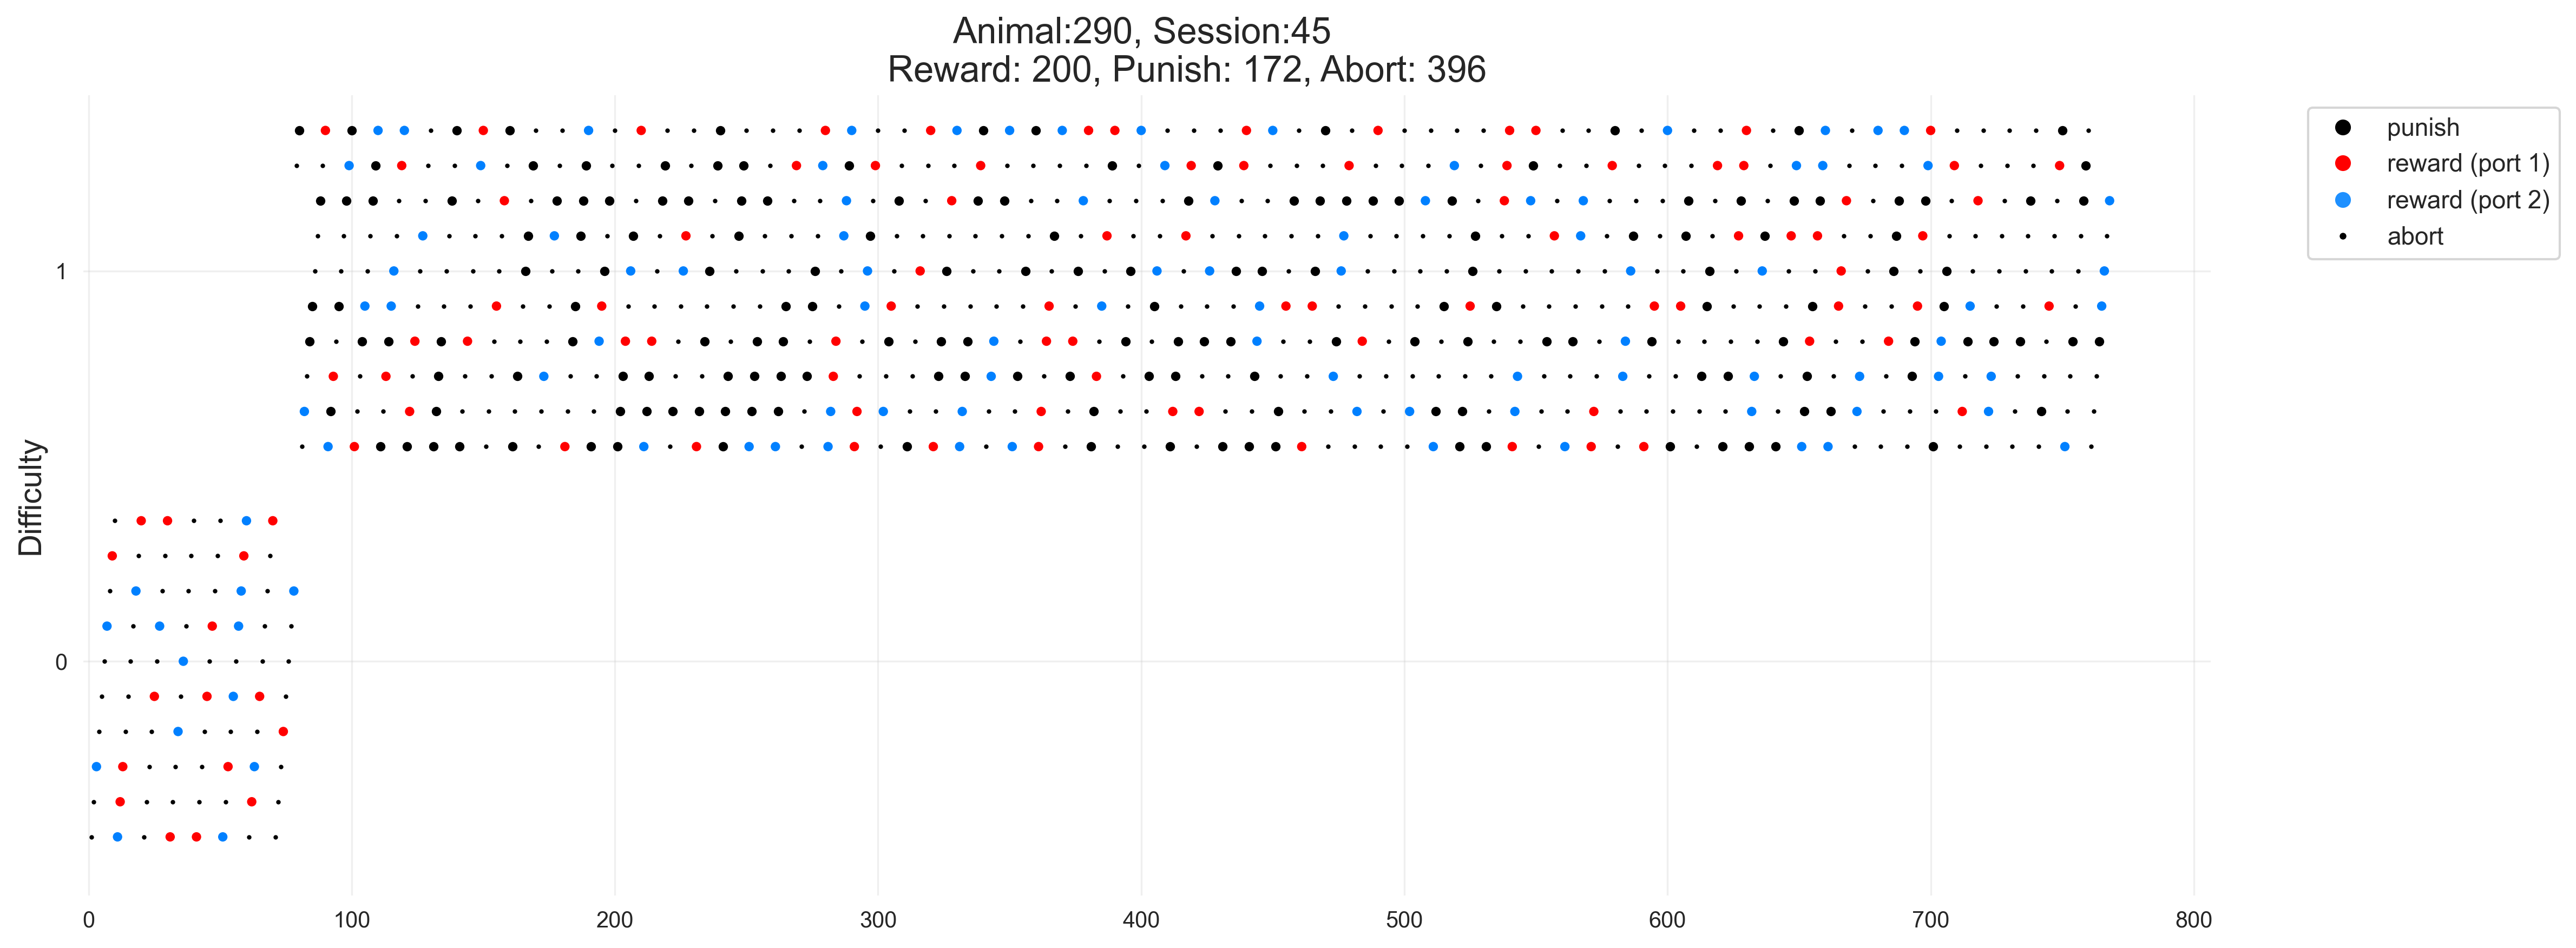

In [3]:
difficultyPlot(animal_id, session)

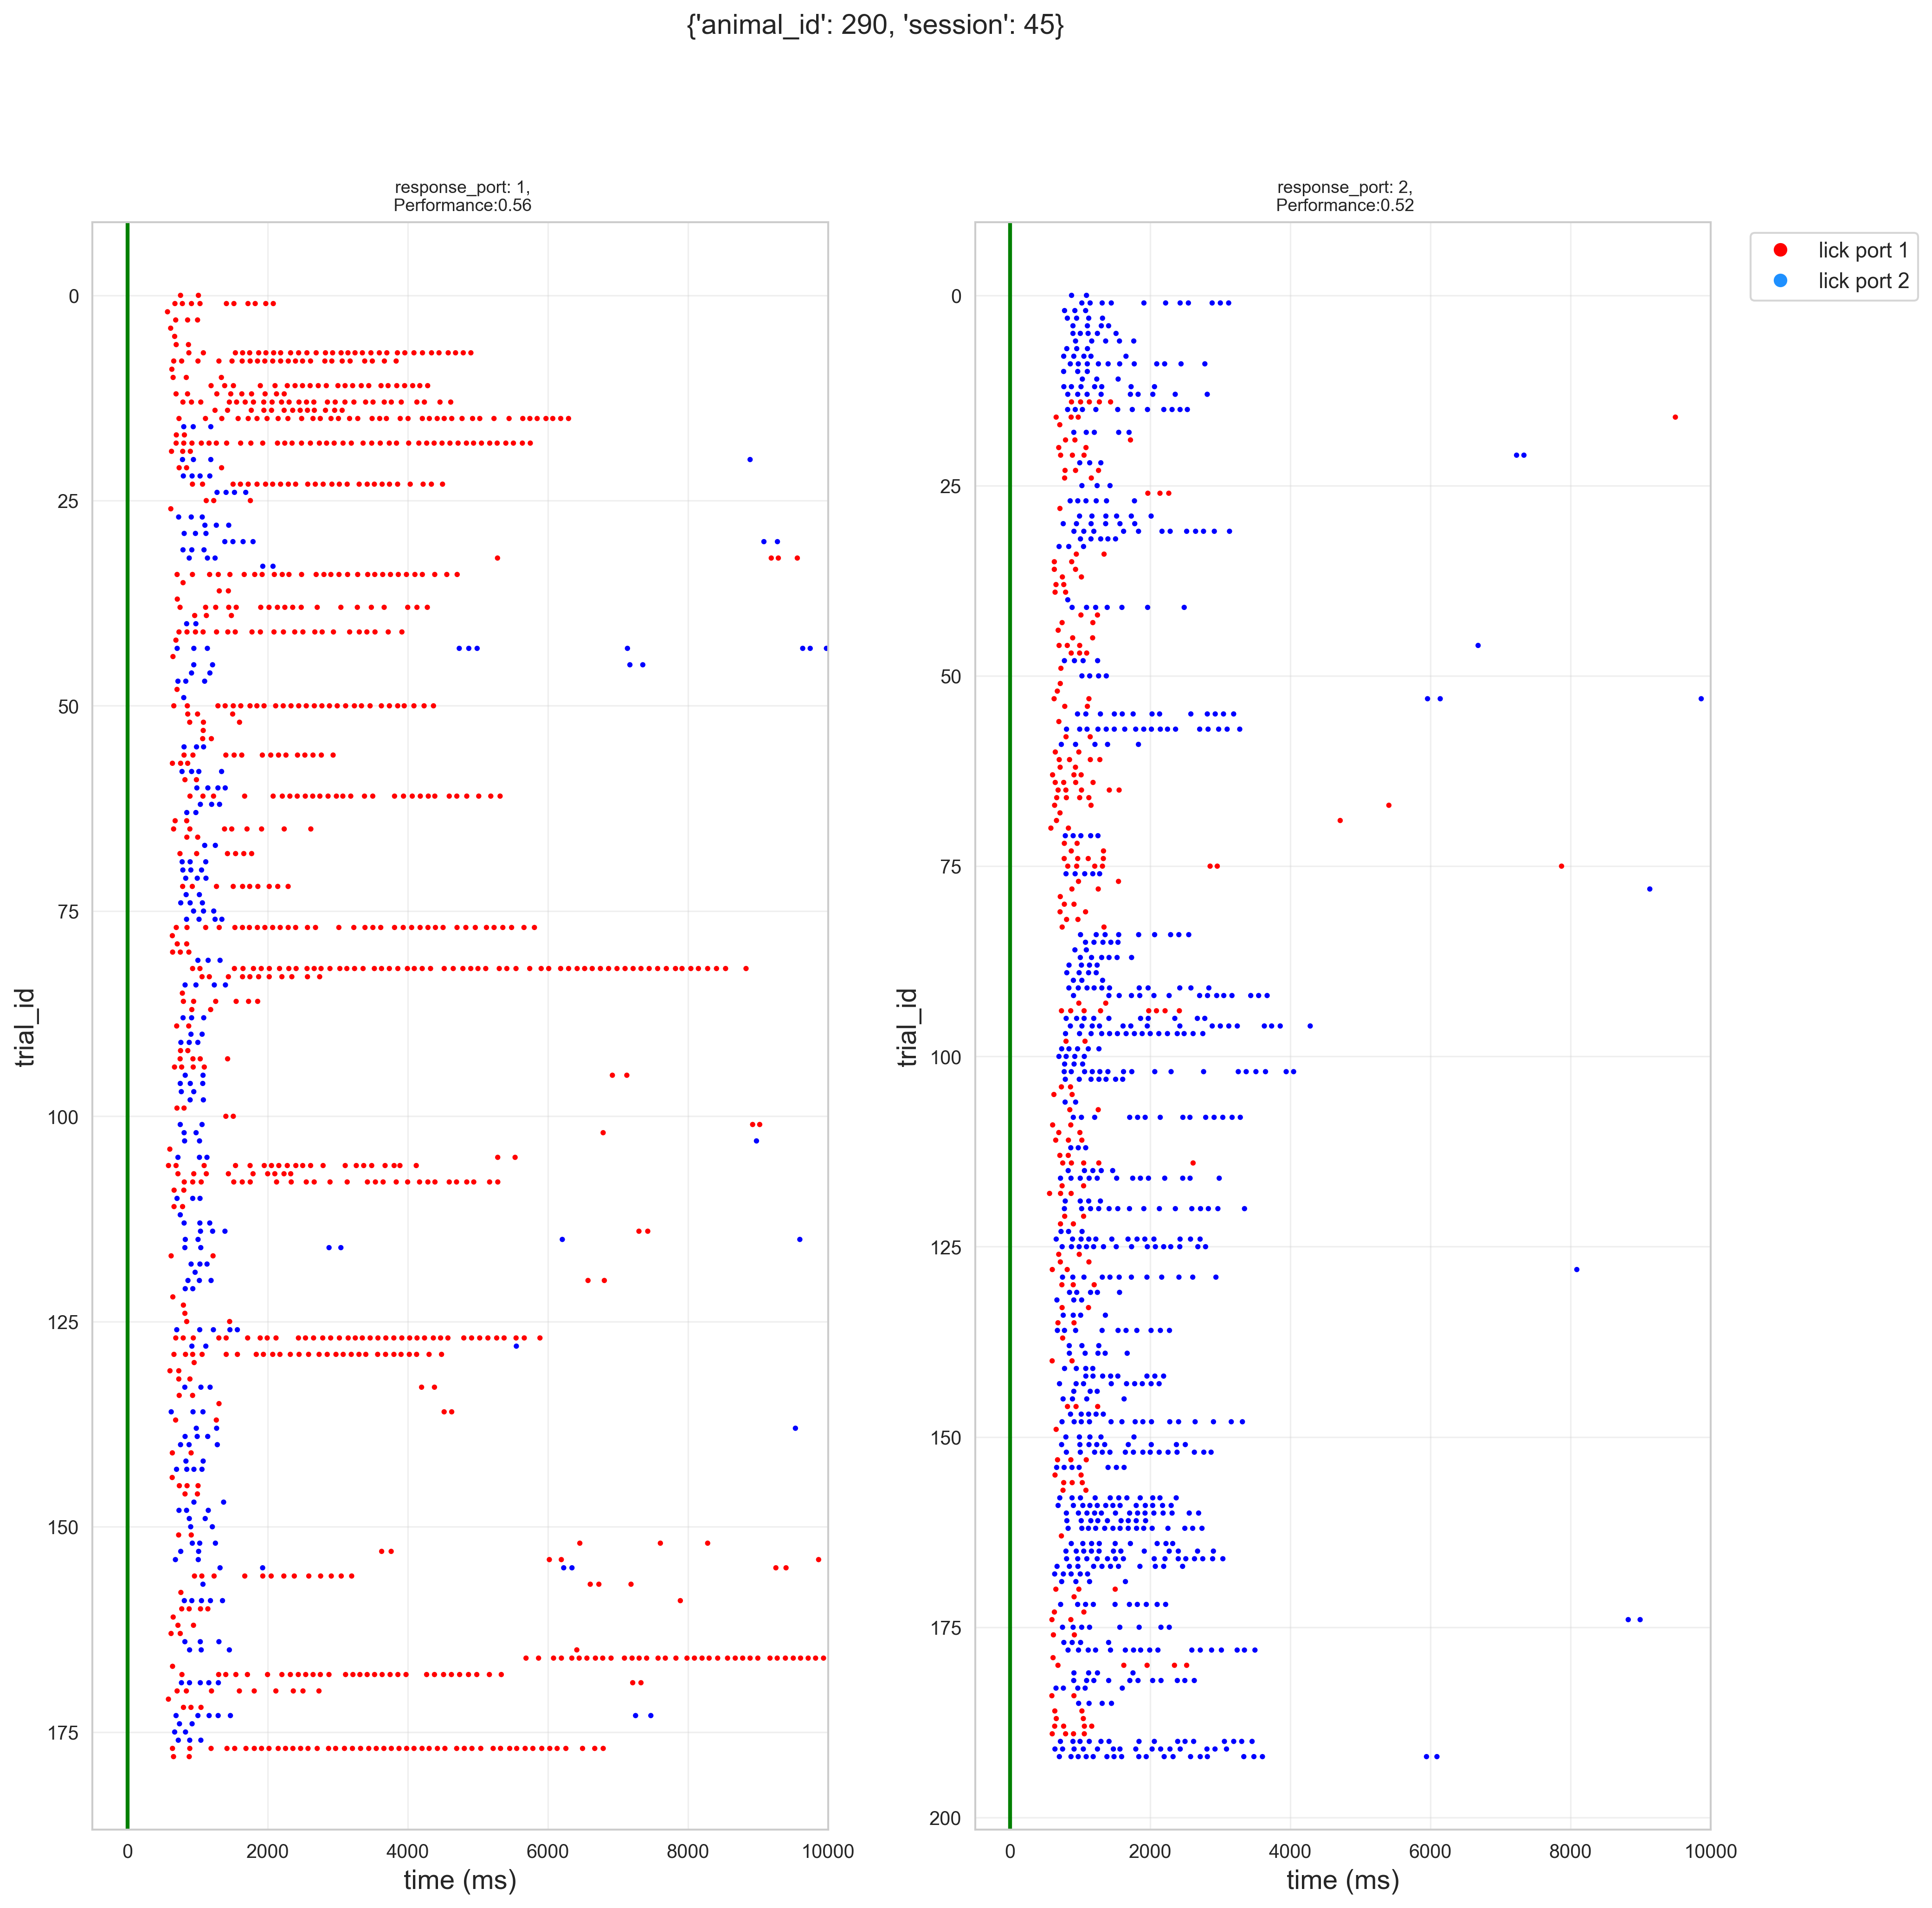

port: 2
 mean licks: 6.73469387755102
 trials count: 98
port: 1
 mean licks: 10.710526315789474
 trials count: 76


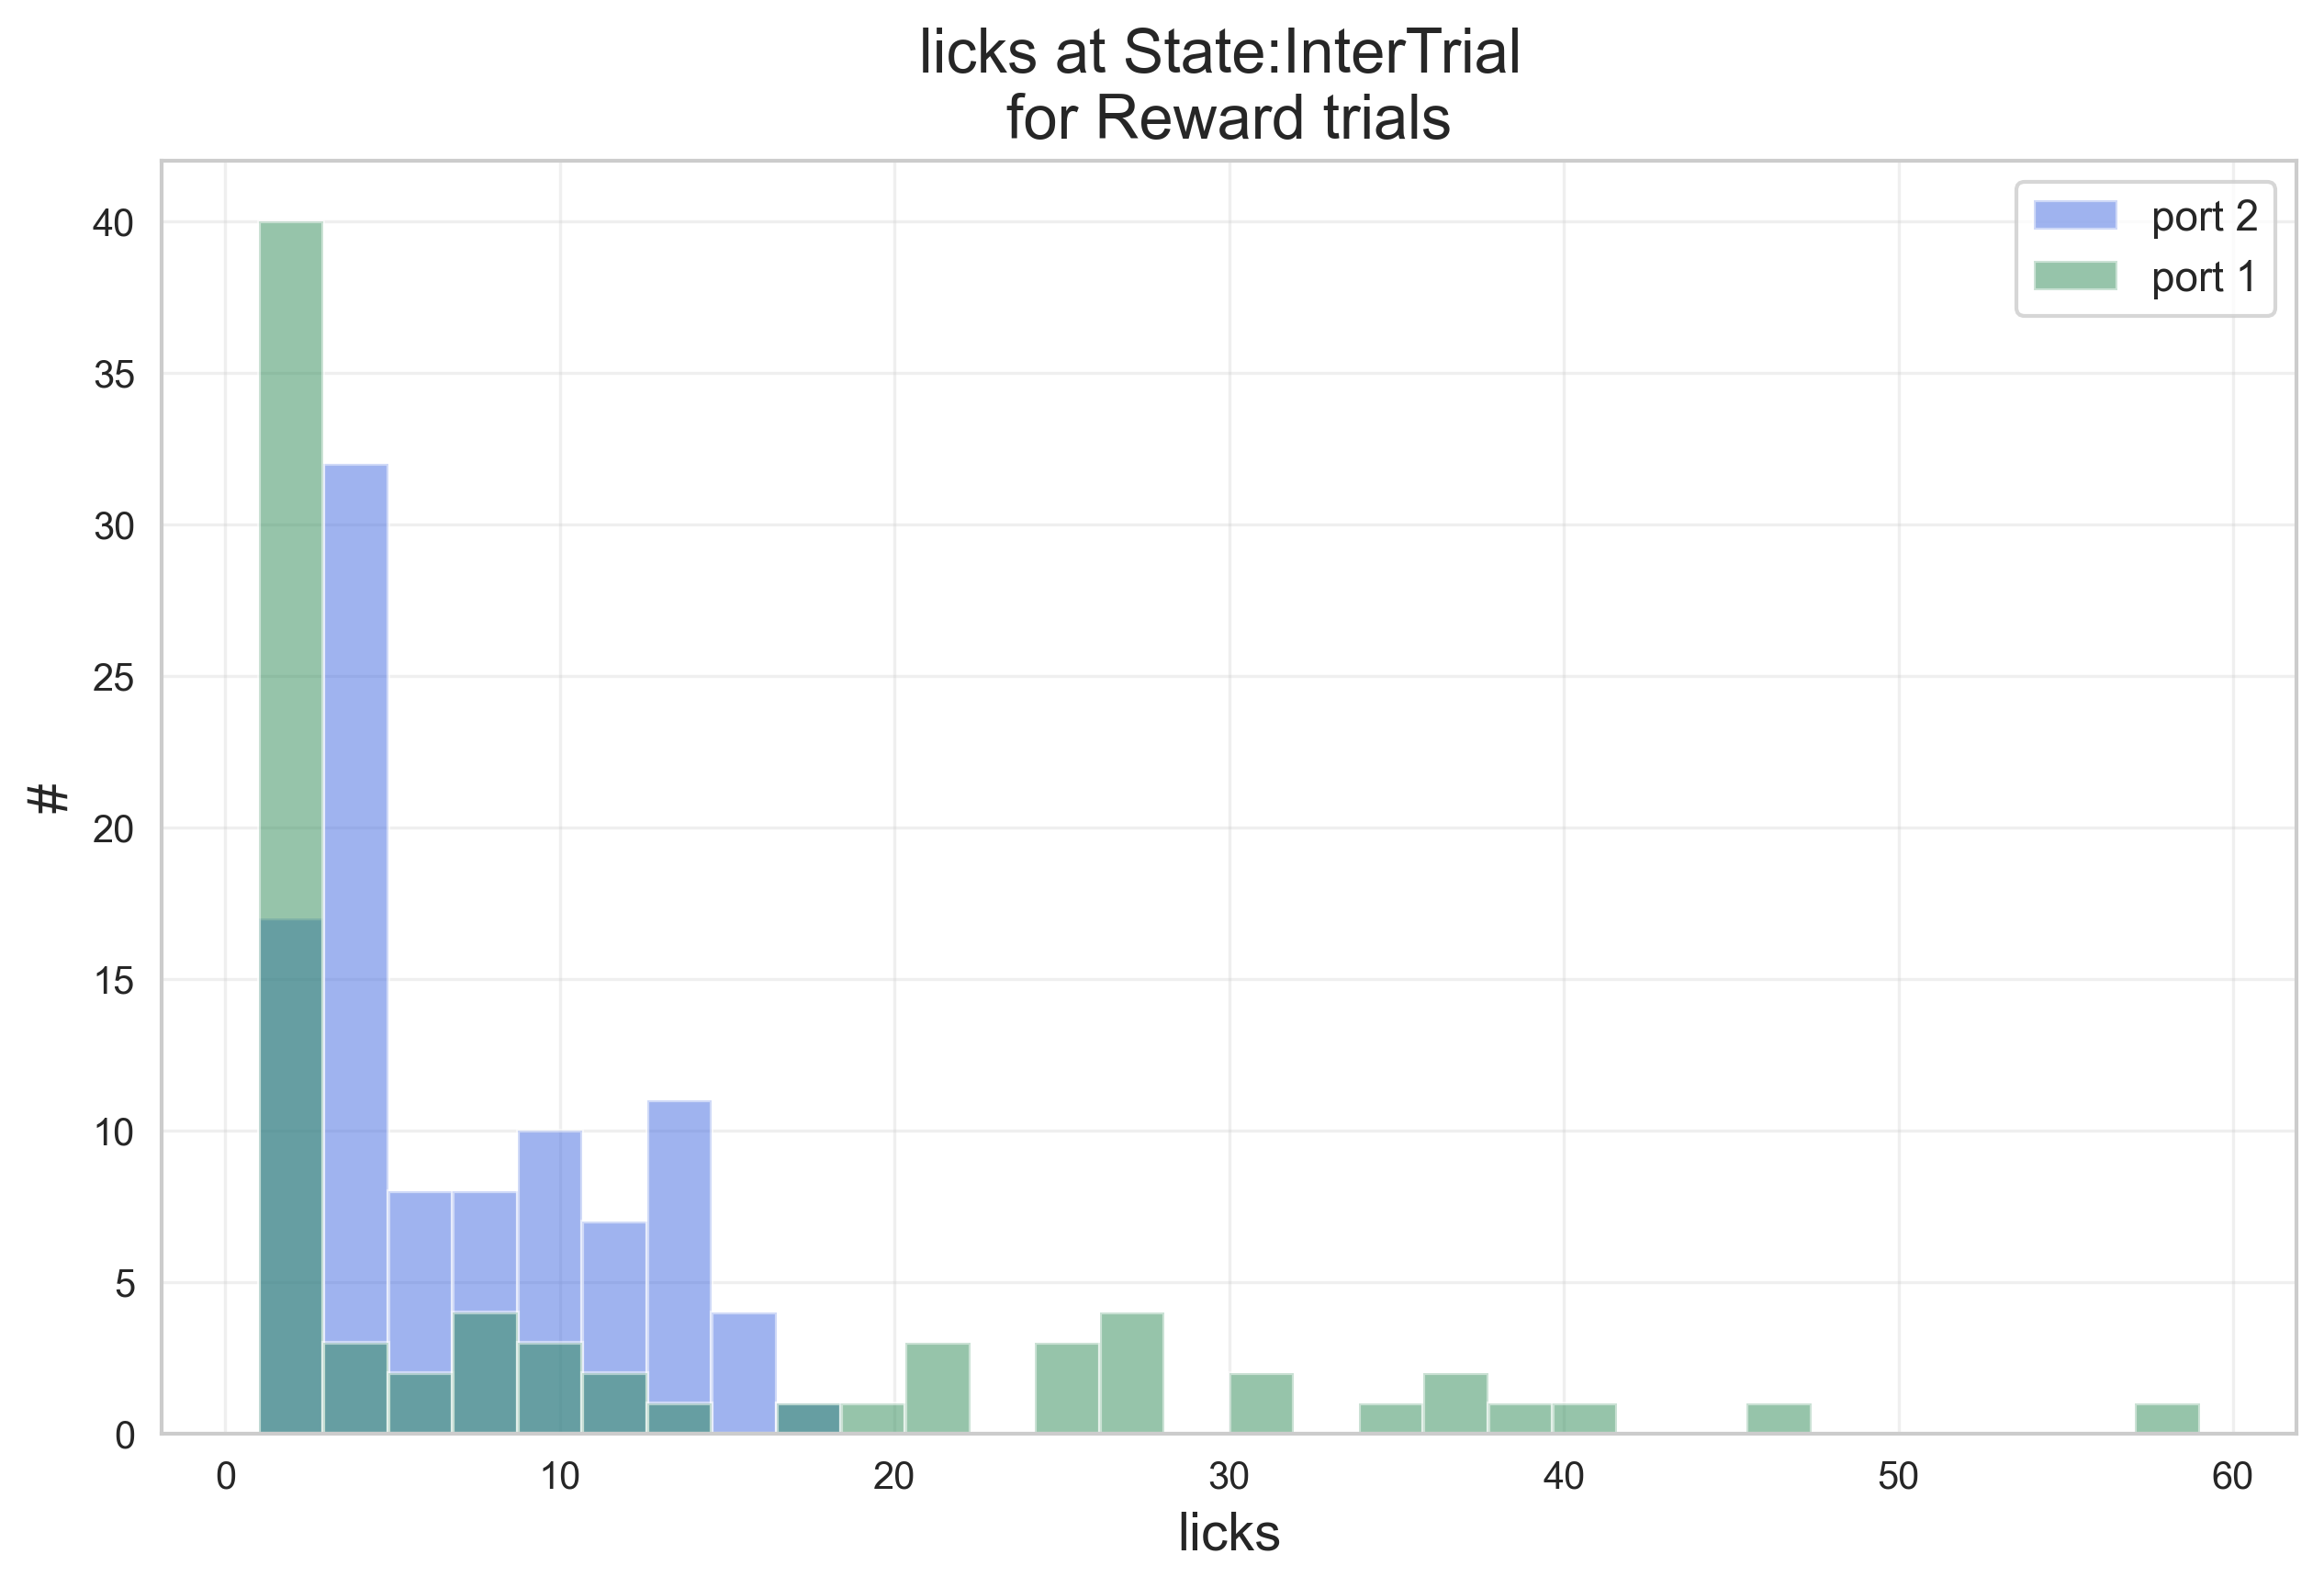

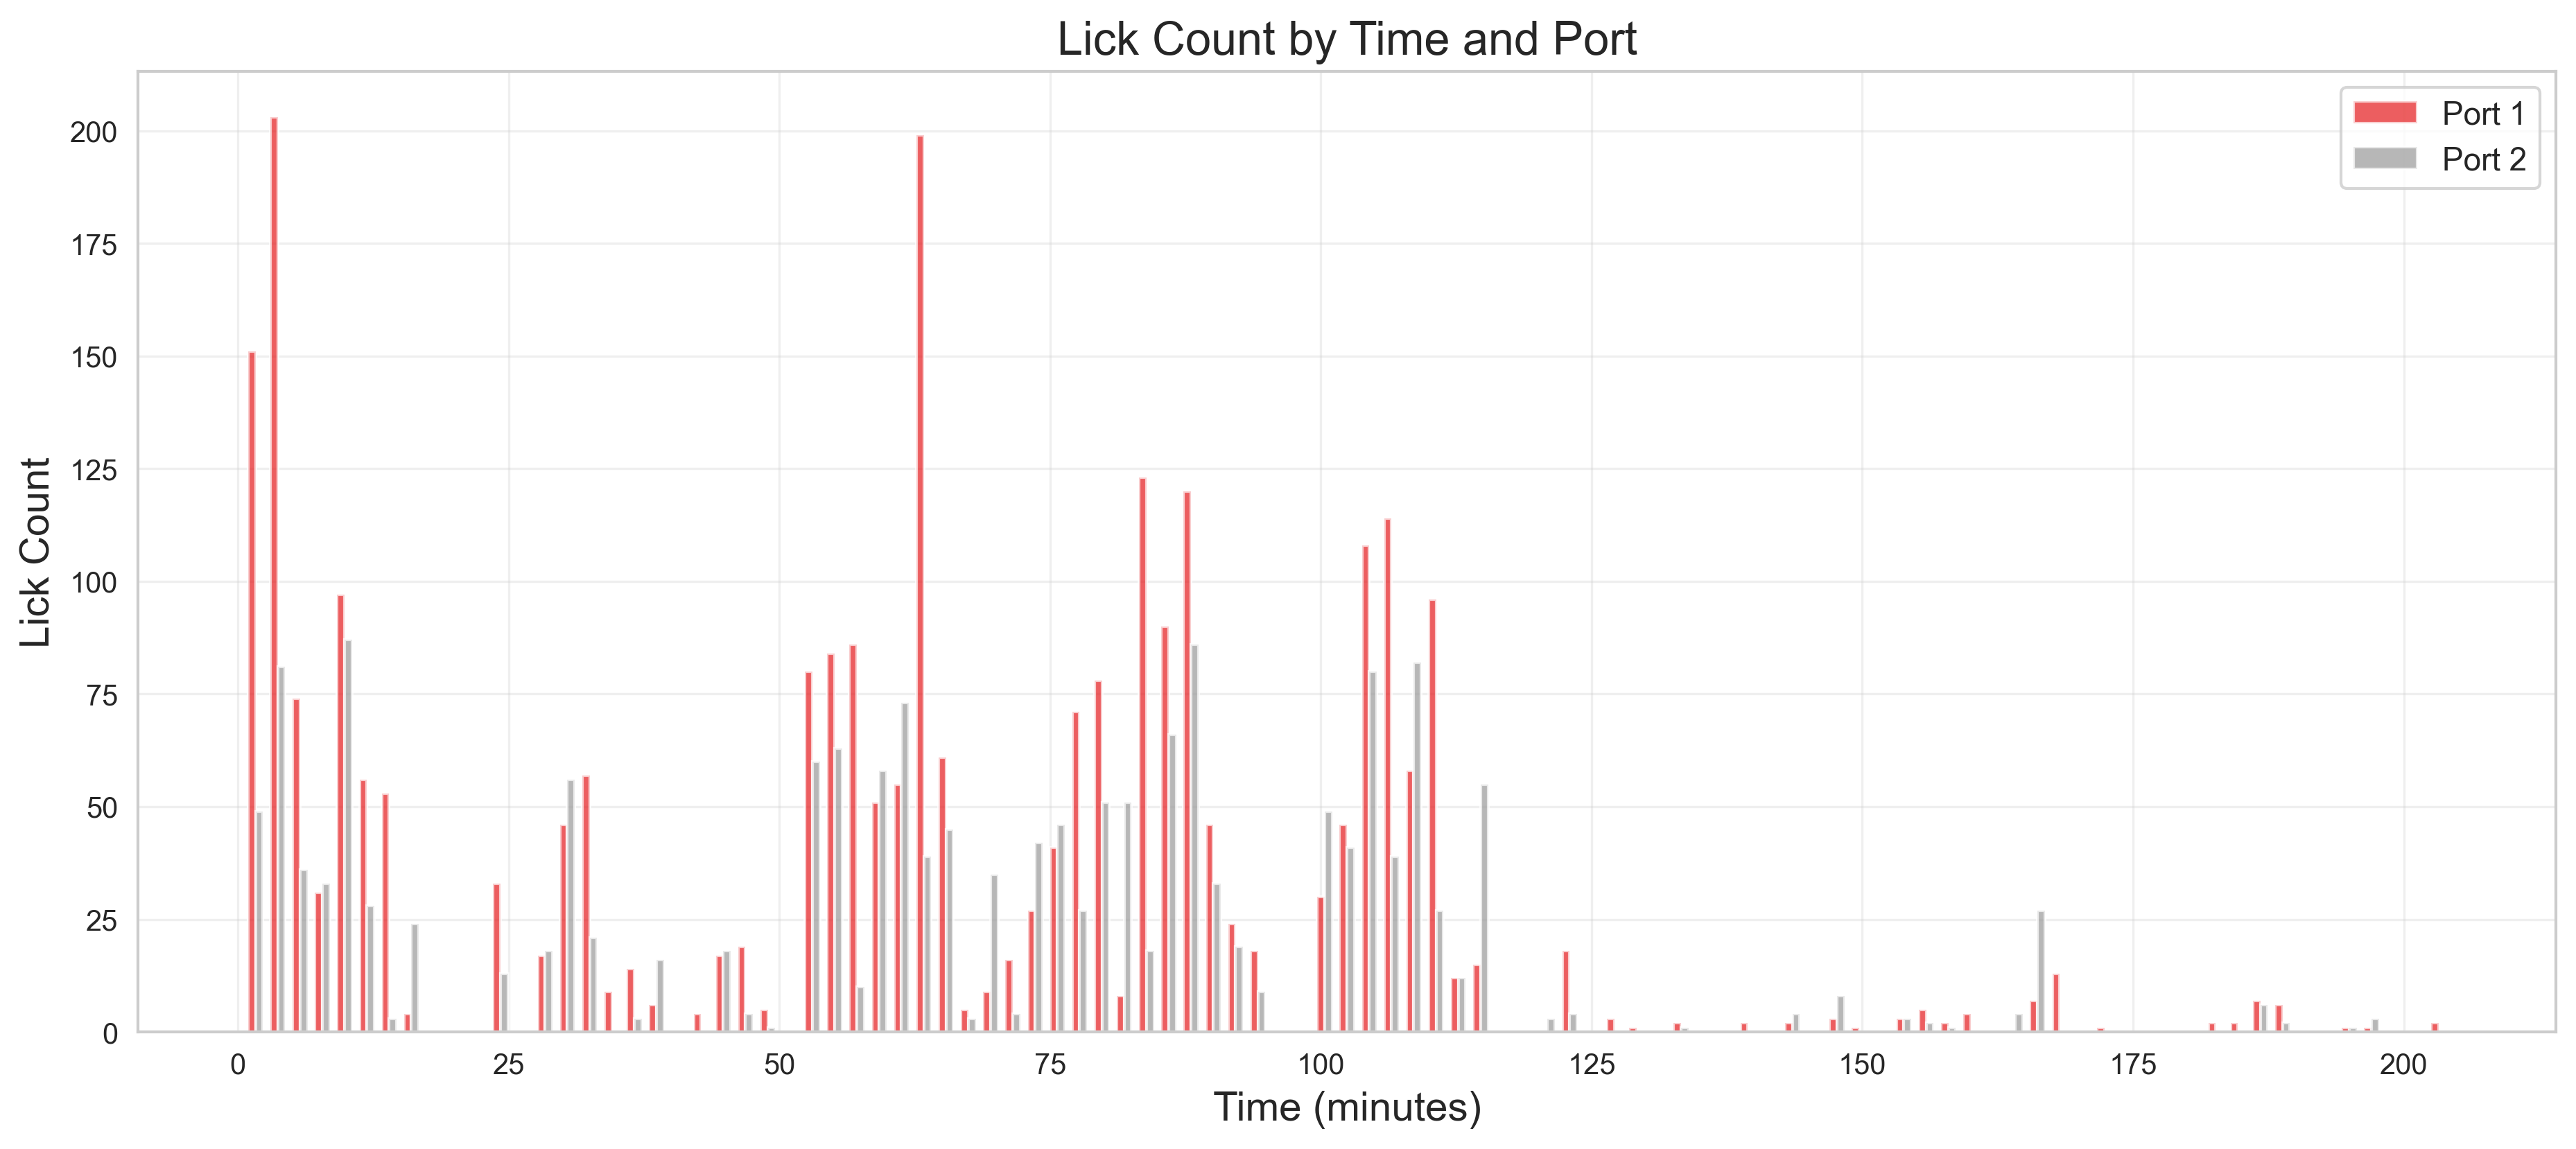

############### last date: 2025-07-15, amount: 1200.0 ###############


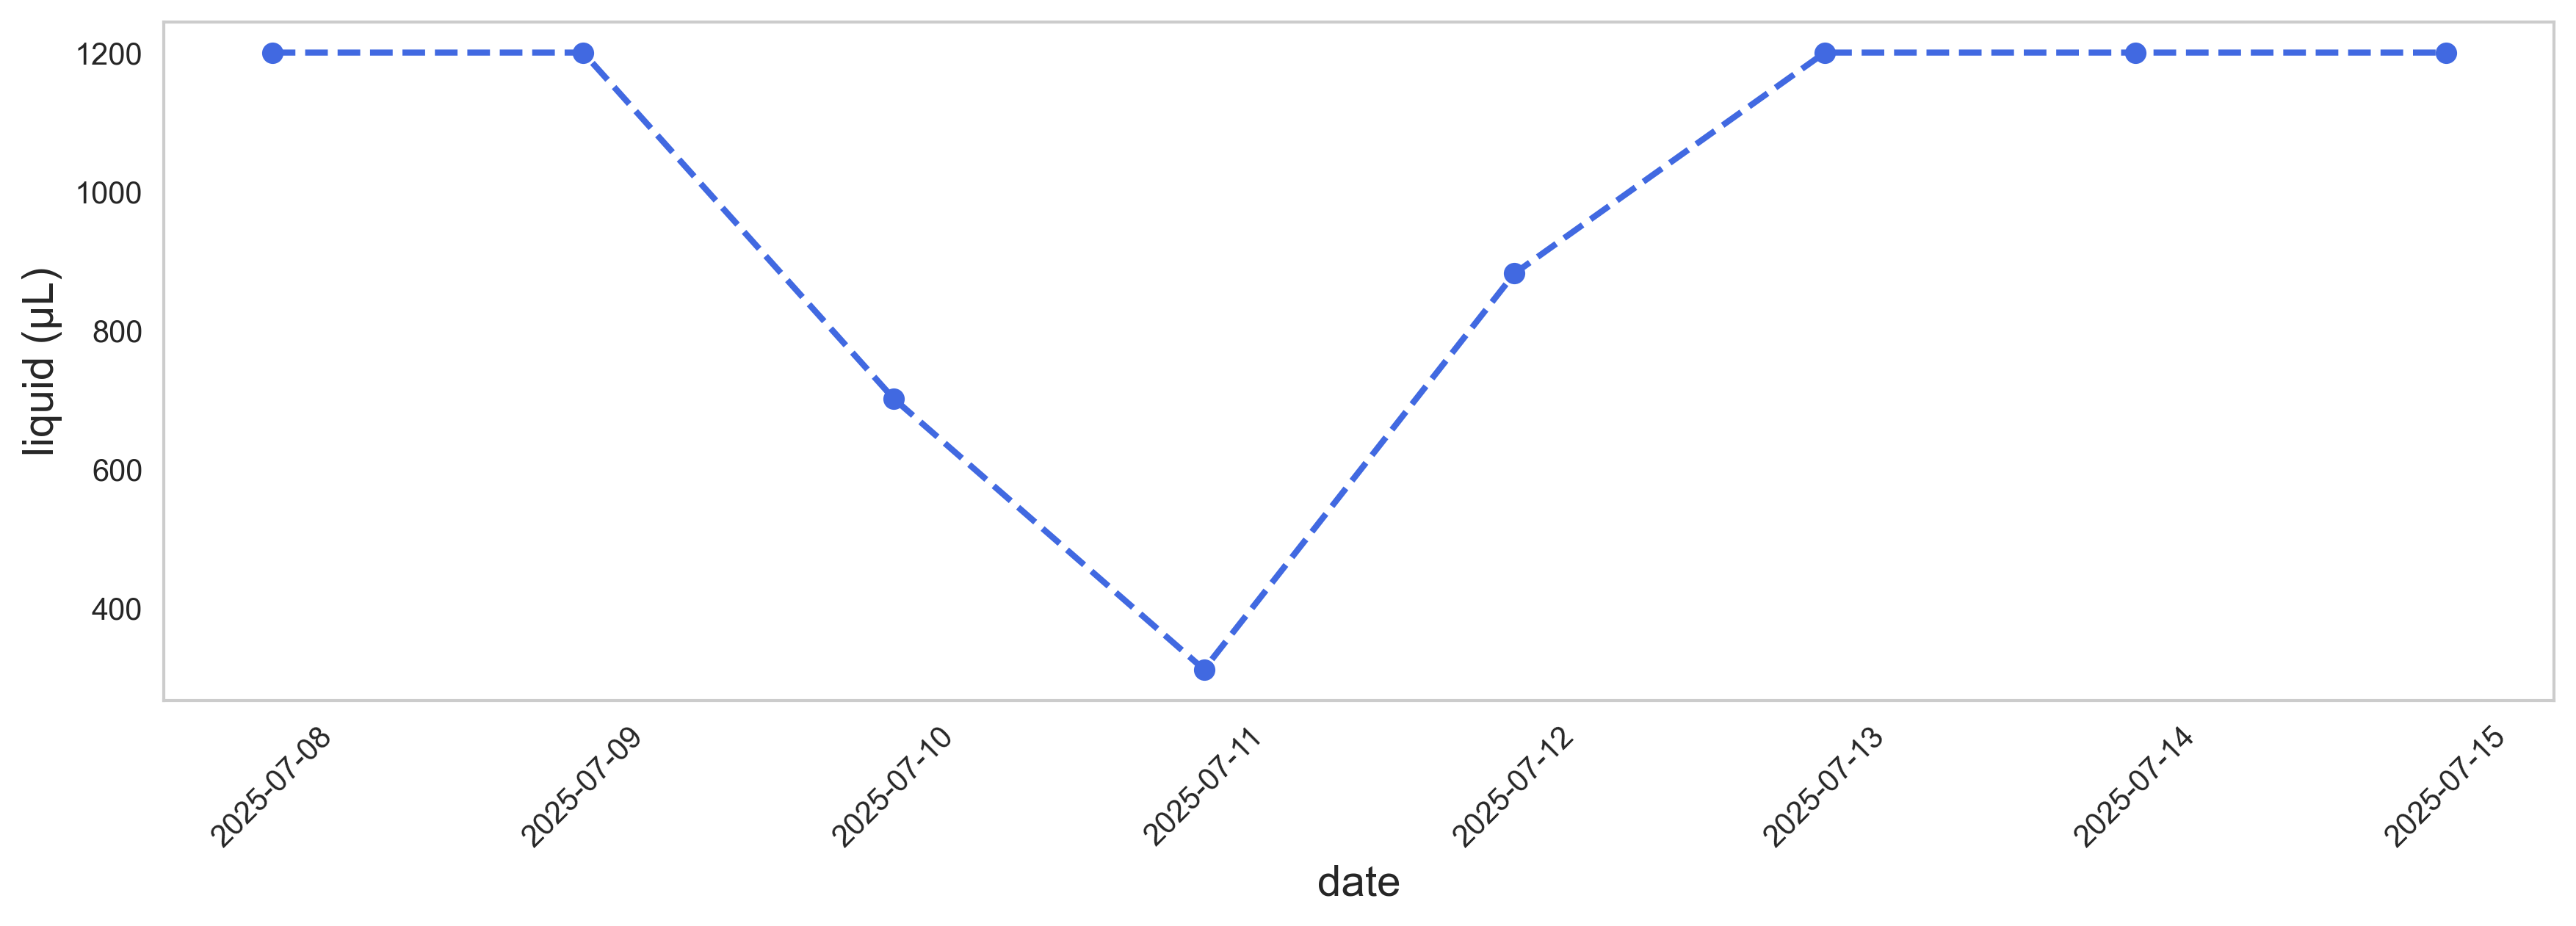

In [4]:
LickPlot(animal_id, session,state_start='Trial')

plot_licks_state(animal_id, session,bins=30)

plot_licks_time(animal_id , session, bins=100)

liquidsPlot(animal_id, days=15)

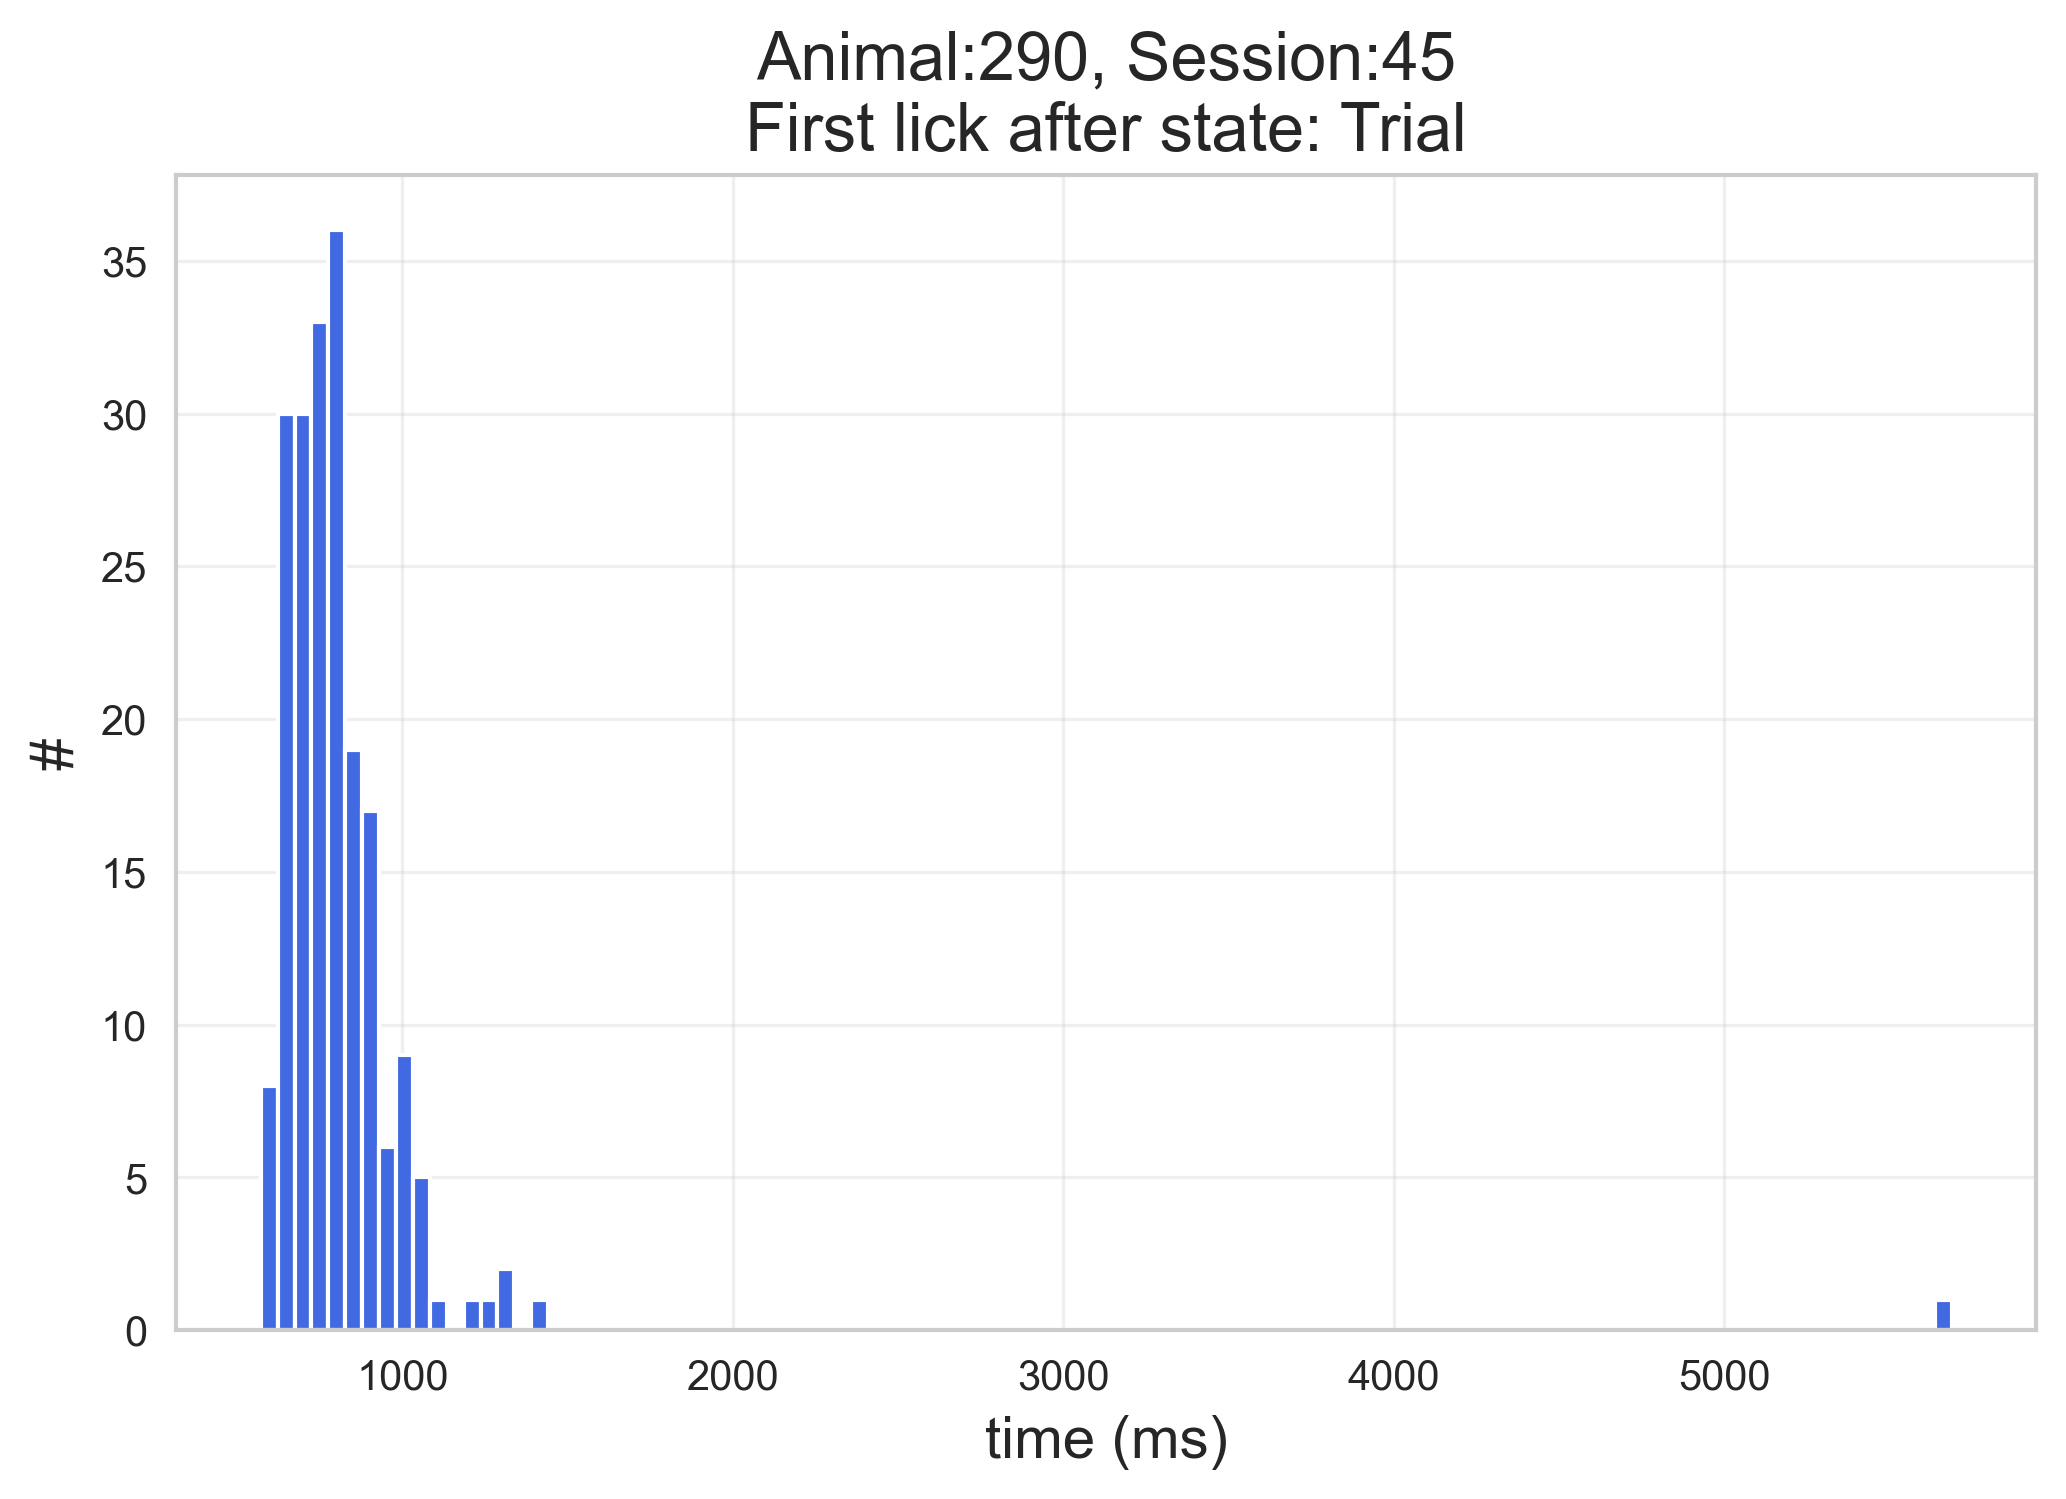

In [8]:
state_first_lick = plot_first_lick_after(animal_id, session, state='Trial', sub_state='Reward')

/Users/alexandros/Documents/GitHub/ethopy_plots/src/ethopy_analysis/plots/session.py:844: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ready_times_state = states_check.groupby("trial_idx").apply(
/Users/alexandros/Documents/GitHub/ethopy_plots/src/ethopy_analysis/plots/session.py:844: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ready_times_state = states_check.groupby("trial_idx").apply(


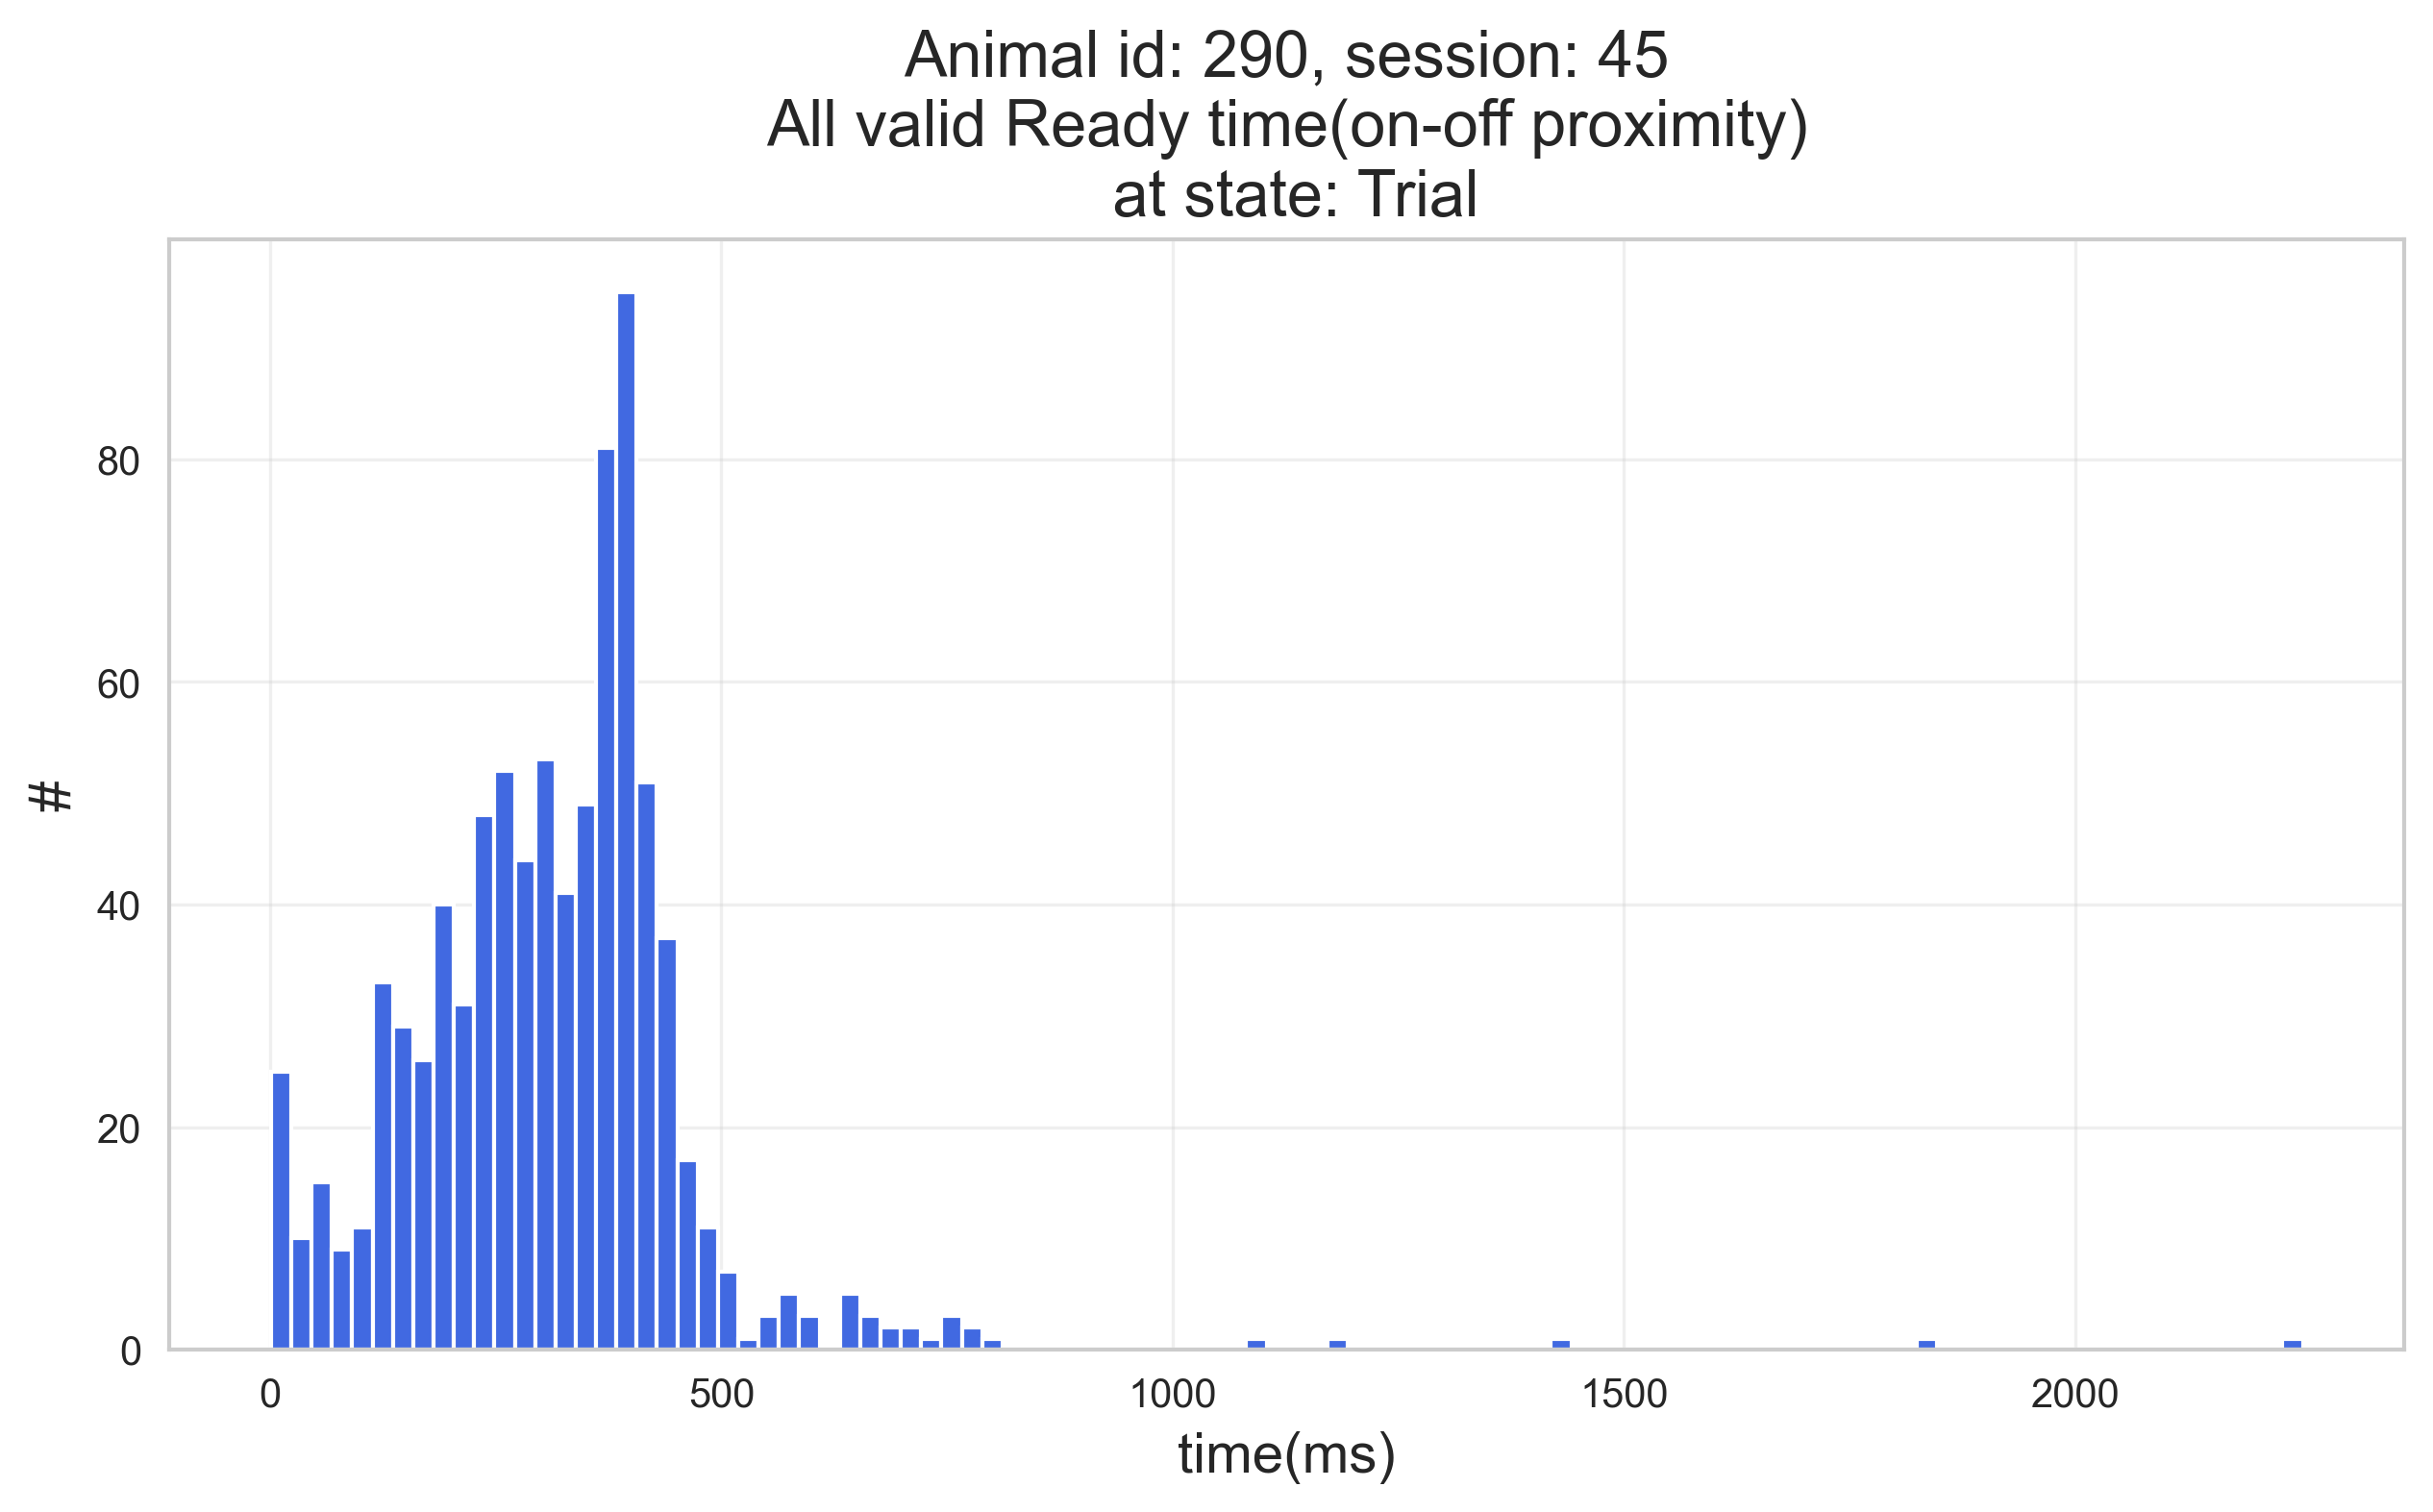

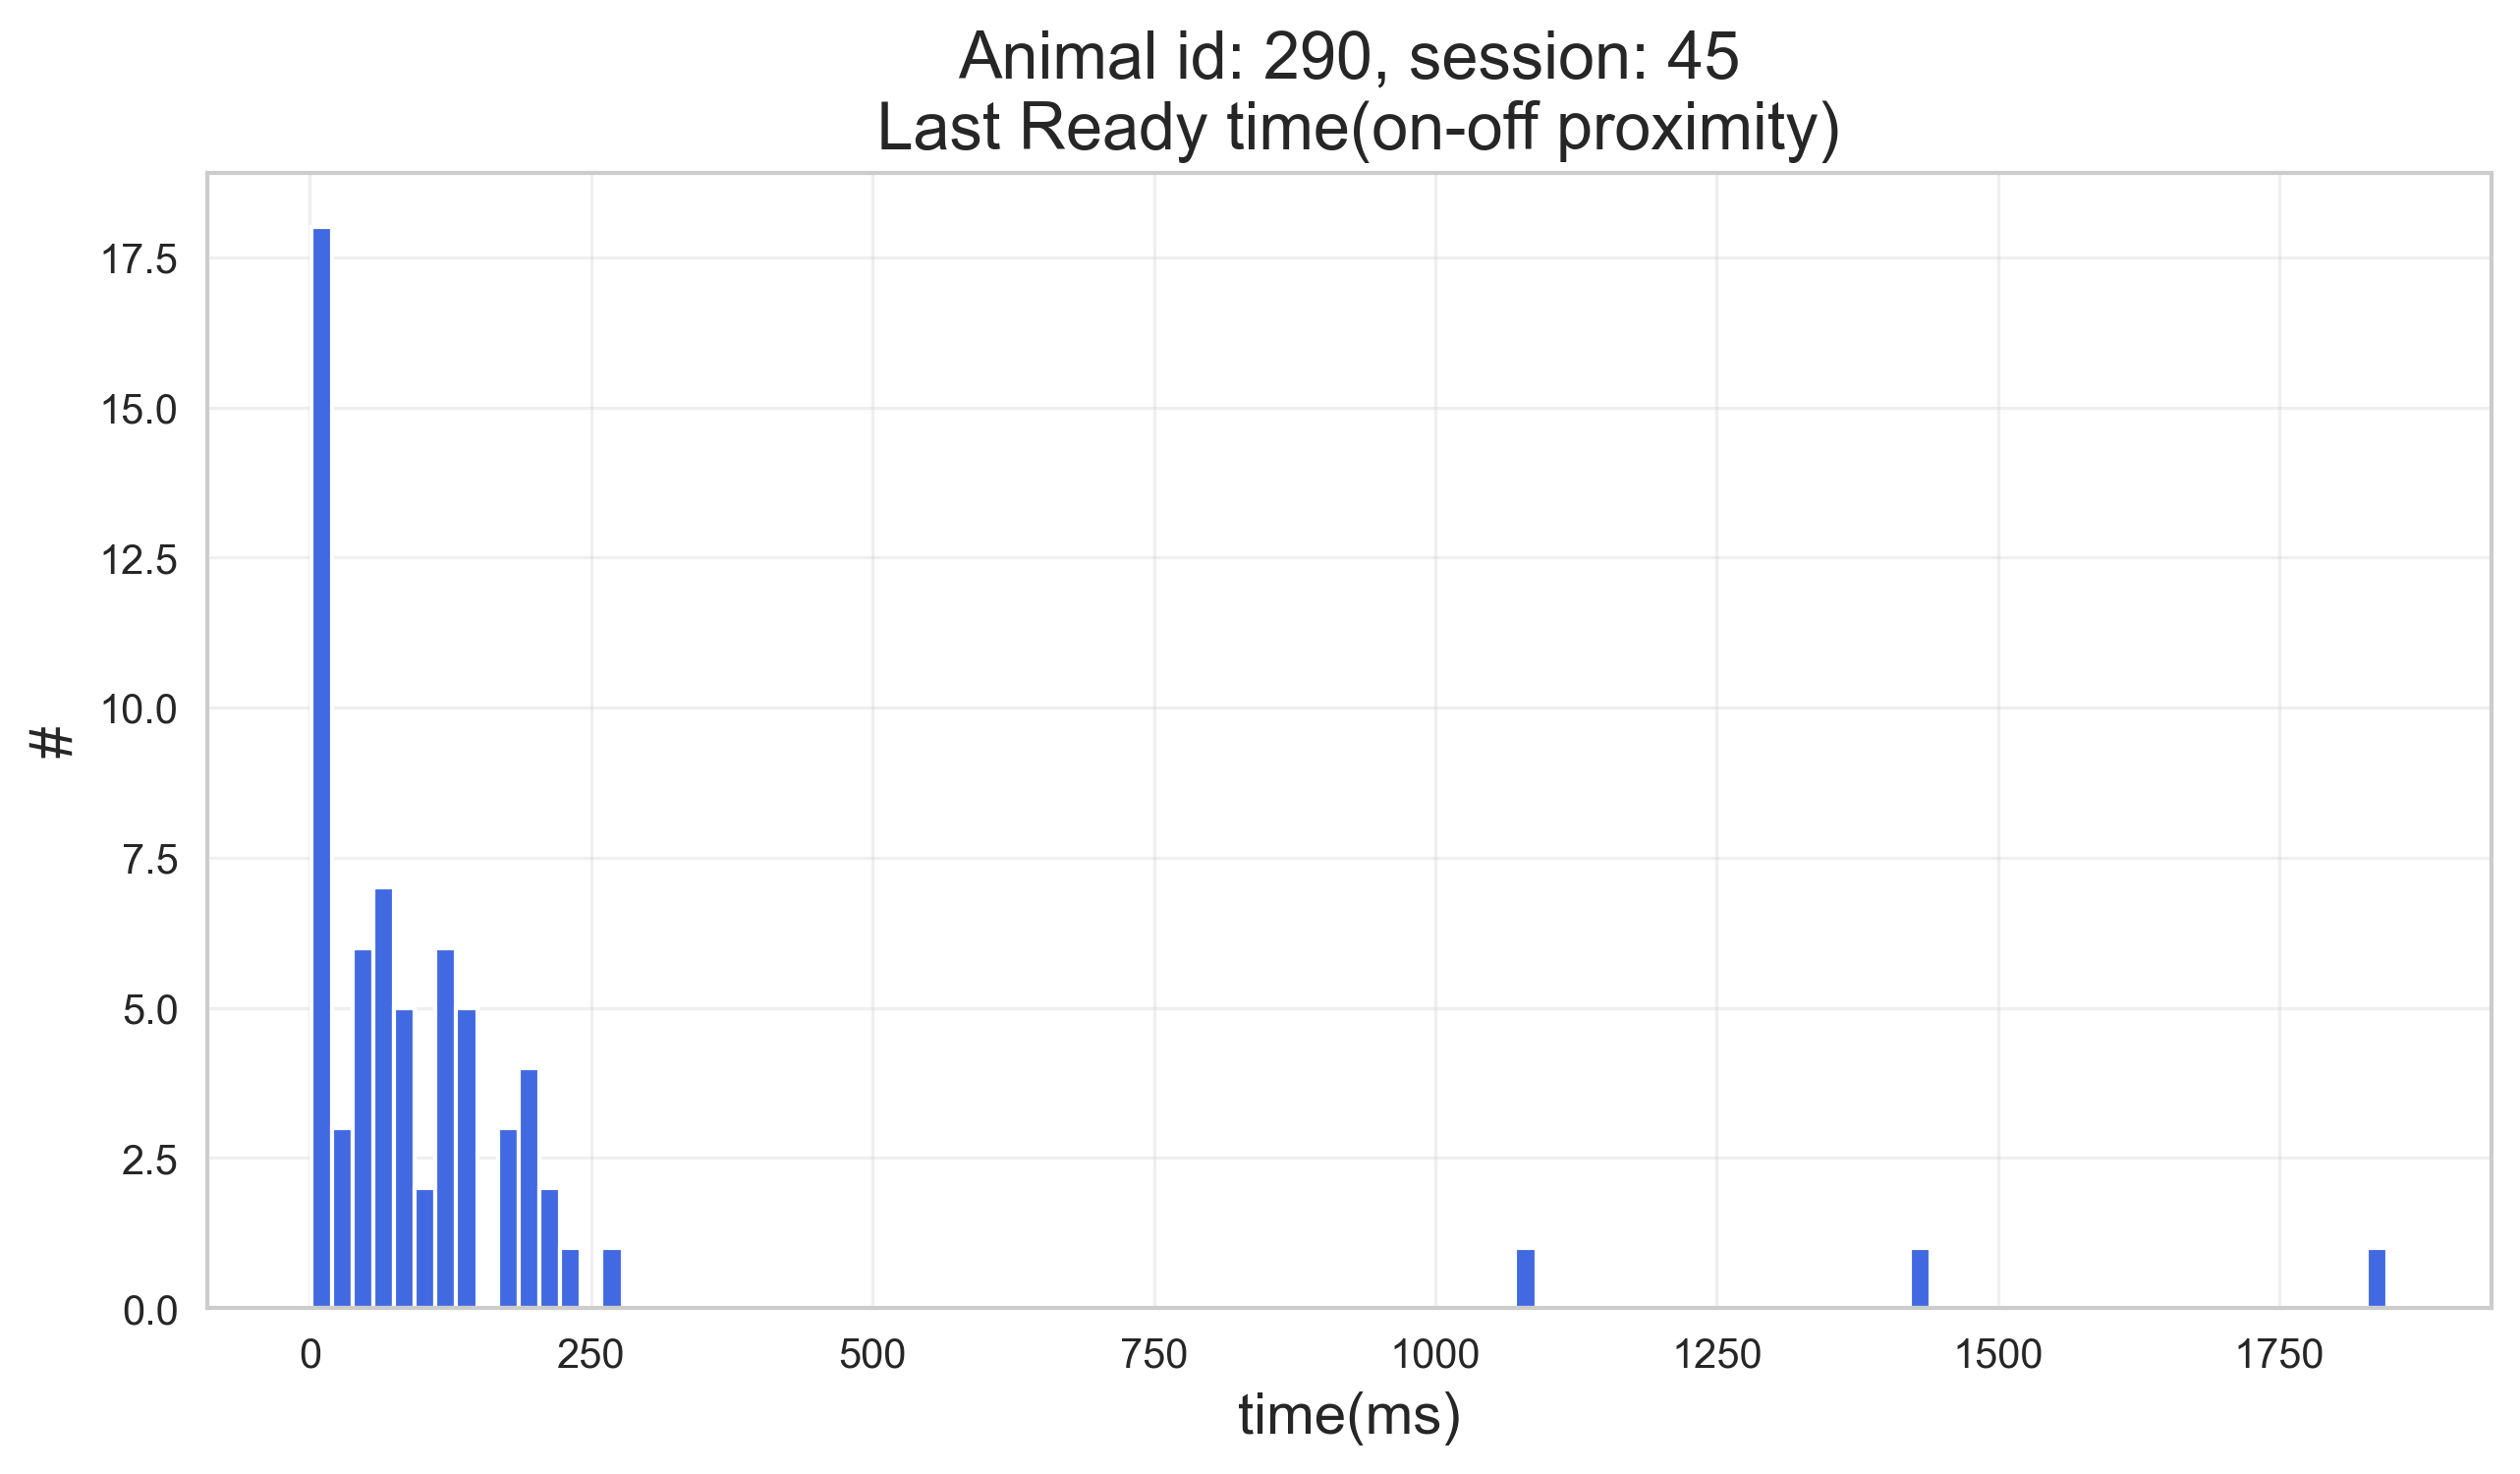

In [9]:
ready_times_state = valid_ready_state(animal_id, session, state = 'Trial')
plot_valid_proximity_state(animal_id, session, state="Trial")


# find the last on-off proximity per trial
last_on_off = [readys[-1] for readys in ready_times_state if len(readys)>1]

plt.figure(figsize=(10, 5))
plt.hist(last_on_off,bins=100);
plt.title(f"Animal id: {animal_id}, session: {session}\n Last Ready time(on-off proximity)")
plt.xlabel("time(ms)")
plt.ylabel("#")
plt.show()

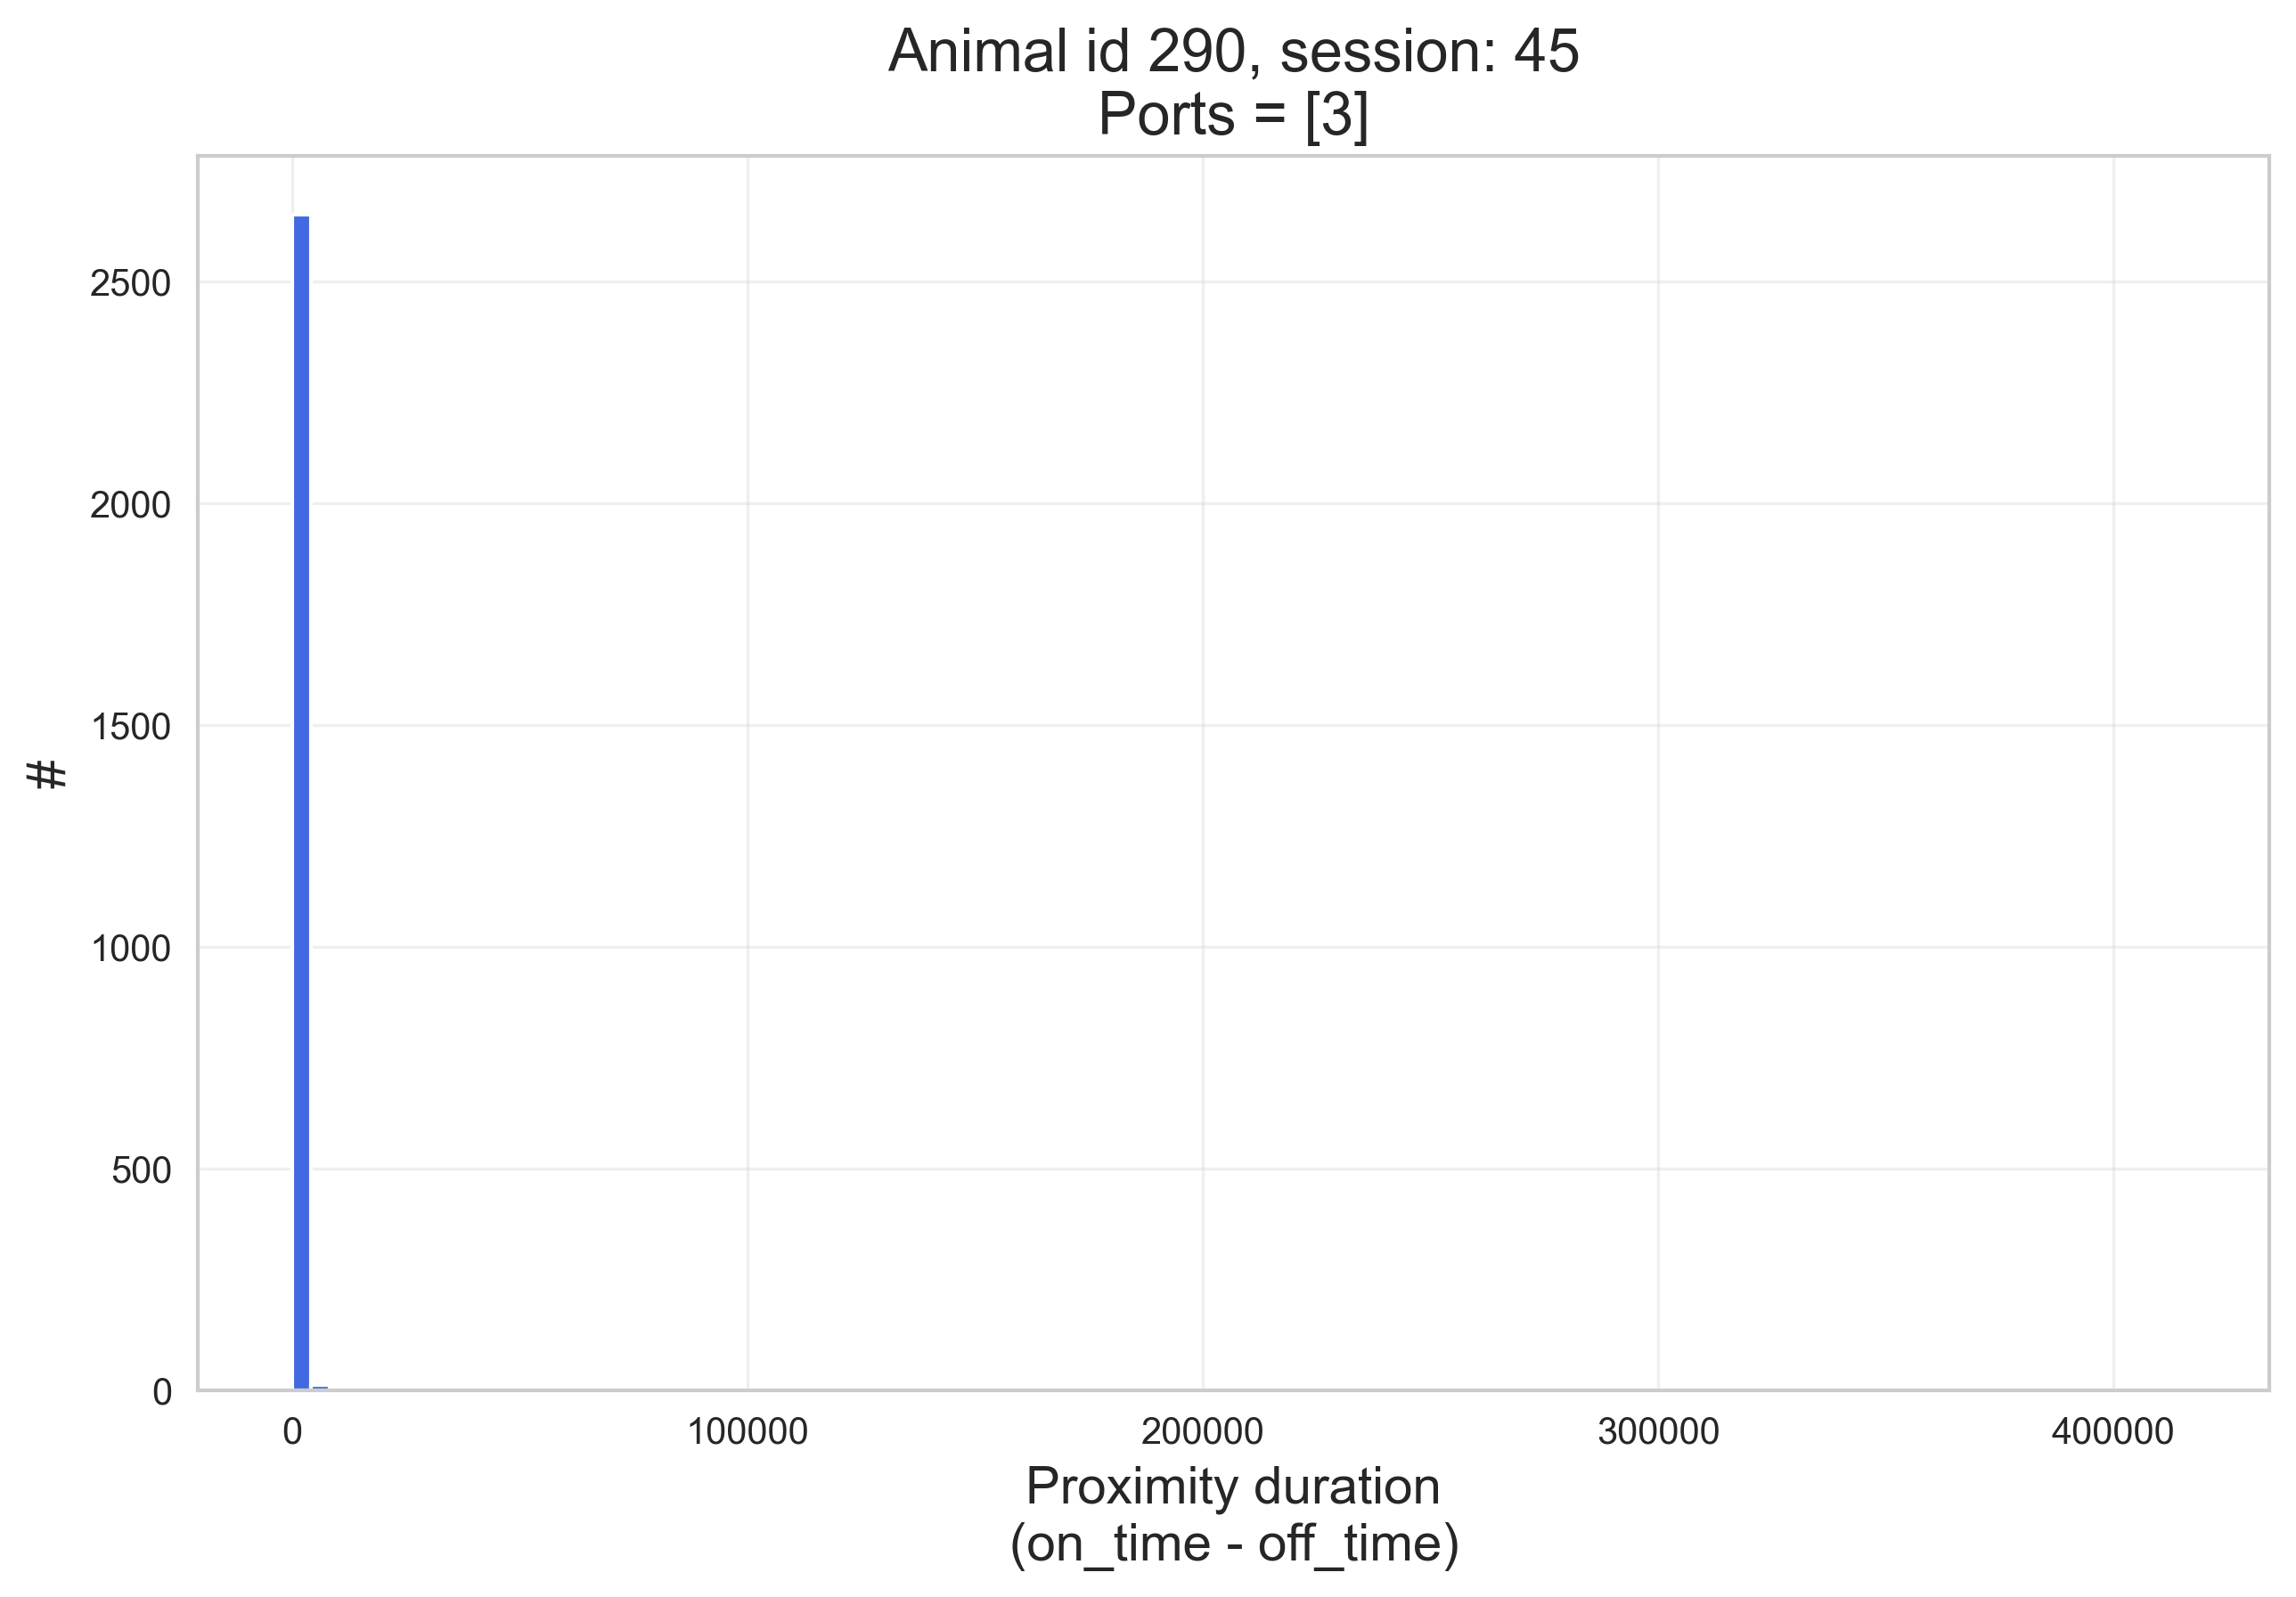

,animal_id,session,trial_idx,port,time_on,in_position,time_off,duration
1447,290,45,241,3,2097810,1,2104771,6961
1590,290,45,254,3,2614182,1,2621601,7419
1911,290,45,273,3,2787103,1,2793244,6141
2581,290,45,360,3,3700599,1,3706231,5632
3405,290,45,466,3,4657880,1,4663906,6026
4510,290,45,637,3,6064521,1,6069702,5181
4866,290,45,693,3,6384743,1,6393382,8639
5323,290,45,768,3,6901452,1,7315071,413619
5363,290,45,768,3,7424778,1,7432497,7719
5391,290,45,768,3,7590068,1,7785879,195811


In [11]:
plot_proximities_dur(animal_id, session, bins=100)

# check duration that might be too long
prox_duration = calculate_proximity_duration(animal_id, session)
prox_duration.loc[prox_duration['duration']>5000]

states of Trial
   animal_id  session  trial_idx    time       state  time_spend
0        290       45         10   95445    PreTrial      3100.0
1        290       45         10   98545       Trial       233.0
2        290       45         10   98778       Abort       500.0
3        290       45         10   99278  InterTrial       804.0
4        290       45         11  100082    PreTrial       313.0
5        290       45         11  100395       Trial       818.0
6        290       45         11  101213      Reward        34.0
7        290       45         11  101247  InterTrial        -0.0
Licks of Trial
    animal_id  session  trial_idx  port    time
0         290       45         10     1   95663
1         290       45         10     1   95774
2         290       45         10     1   95874
3         290       45         10     1   96076
4         290       45         10     1   96229
5         290       45         10     1   96351
6         290       45         10     1   96588


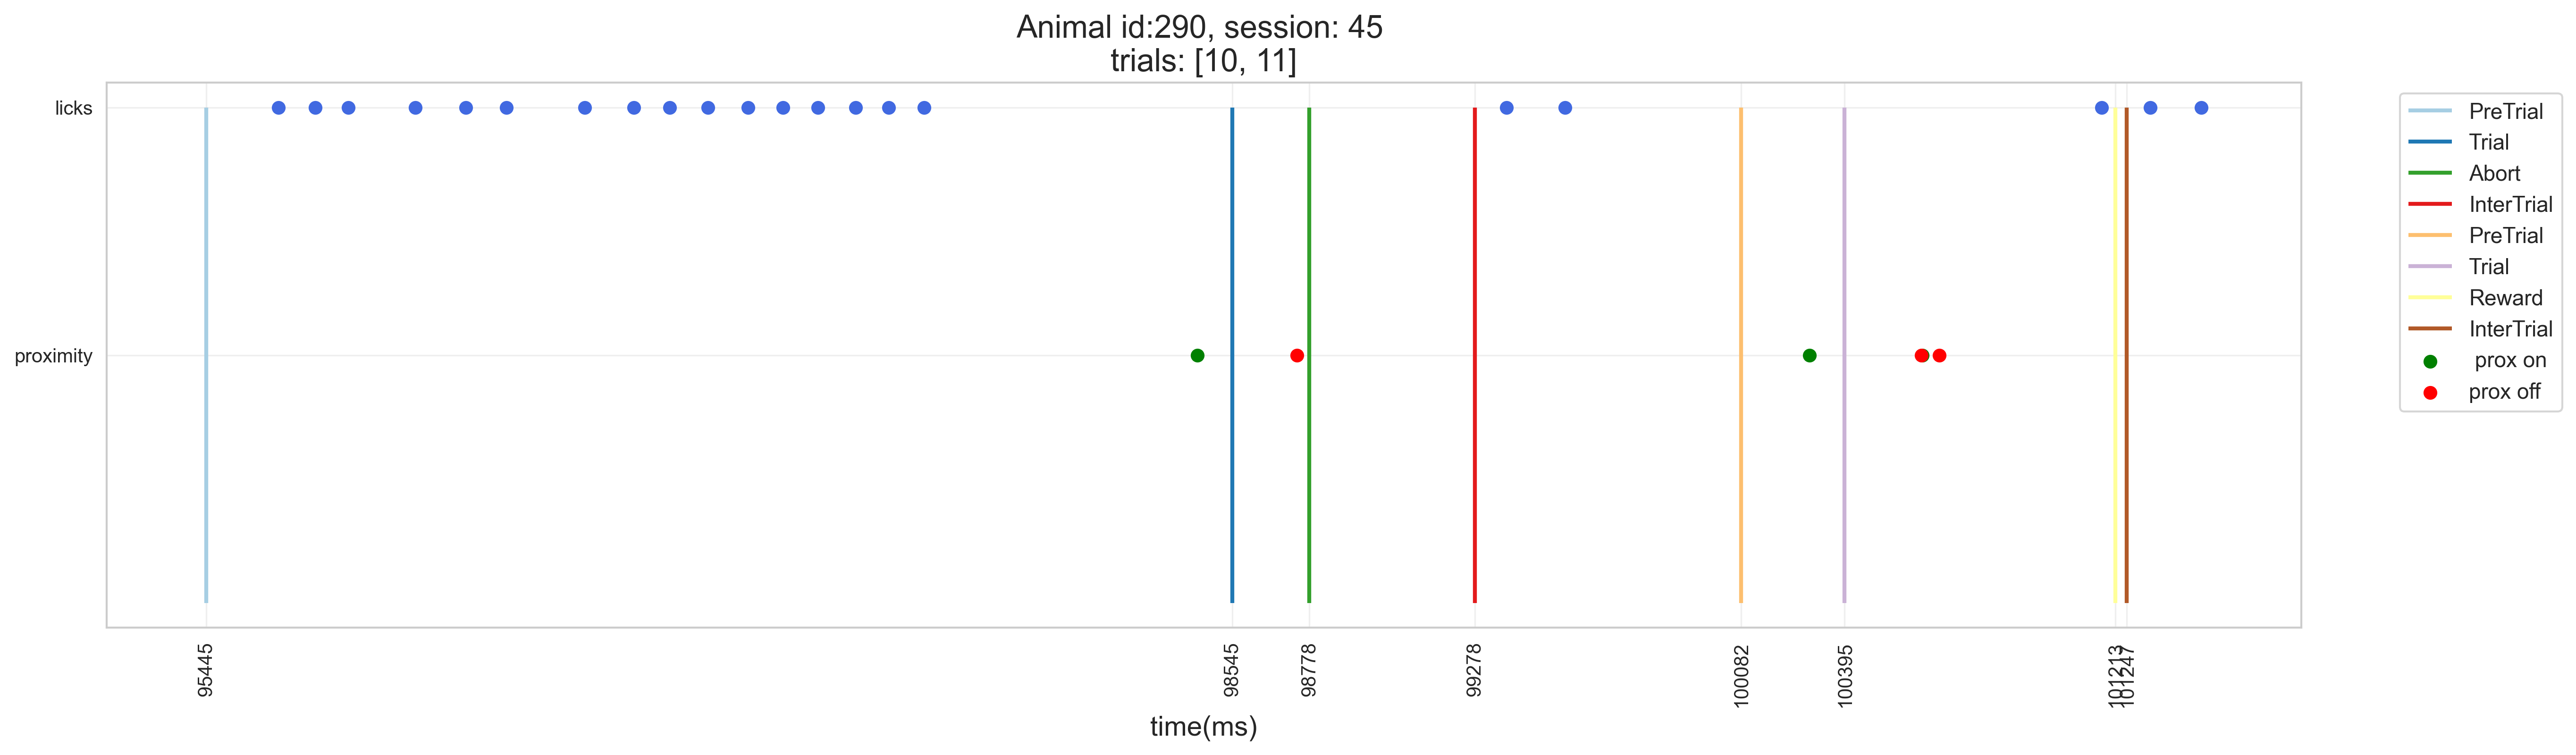

In [12]:
trial_states, trial_licks, trial_prox = plot_trial_time(animal_id, session, trials = [10,11])

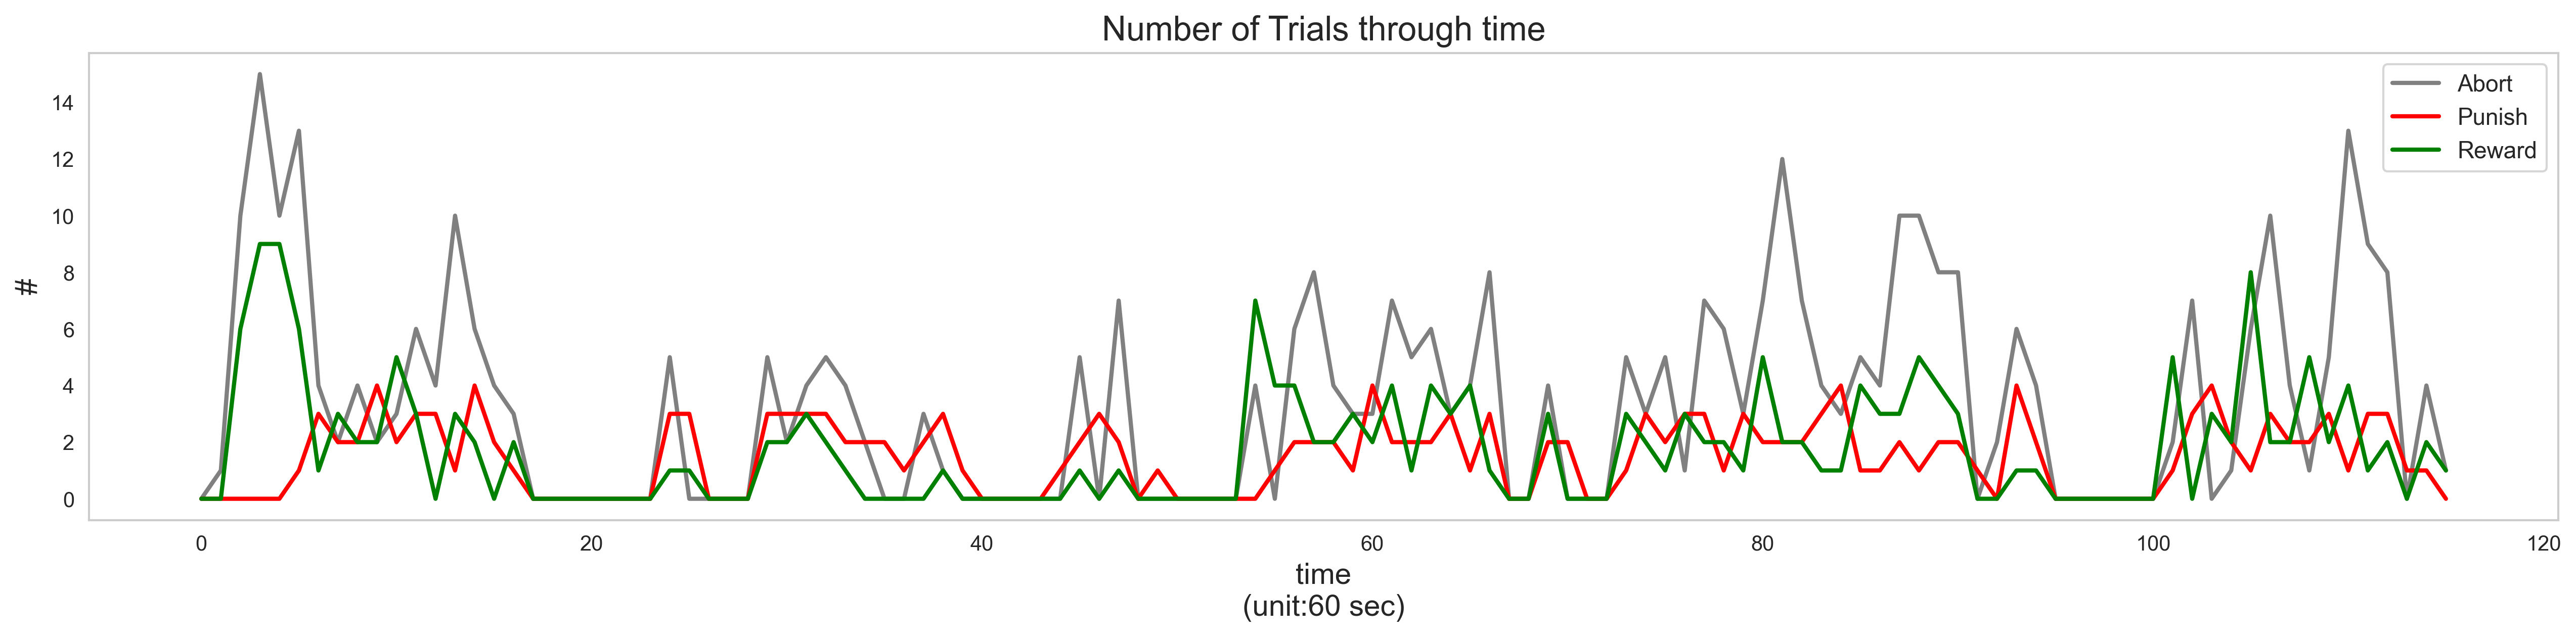

In [15]:
plot_states_in_time(animal_id, session, seconds=60)